Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases). The images are 28x28

In [58]:
### Run all at once for best results
import os
# Make  assignment directory
MATH156_path = './'
os.makedirs(os.path.join(MATH156_path, 'Project', 'data'), exist_ok=True)
root_dir = os.path.join(MATH156_path, 'Project')

In [59]:
# Download the tar ball from google drive using its file ID.
!pip3 install --upgrade gdown --quiet
!gdown 1GkBOFbi-ejWyq6wDo9rW5EtAg8GRj8Vq # this is the file ID of the asl mnist dataset

Downloading...
From (uriginal): https://drive.google.com/uc?id=1GkBOFbi-ejWyq6wDo9rW5EtAg8GRj8Vq
From (redirected): https://drive.google.com/uc?id=1GkBOFbi-ejWyq6wDo9rW5EtAg8GRj8Vq&confirm=t&uuid=8983ad8c-8c06-4099-a06b-66fb6edb9a8b
To: /content/math156_final_project.tar.gz
100% 62.4M/62.4M [00:00<00:00, 106MB/s]


TODO: remove the extra empty folders

In [60]:
import tarfile
from tqdm import tqdm

tar = tarfile.open("math156_final_project.tar.gz", "r:gz")
# Extract the file to the "./Project/data" folder
total_size = sum(f.size for f in tar.getmembers())
with tqdm(total=total_size, unit="B", unit_scale=True, desc="Extracting tar.gz file") as pbar:
    for member in tar.getmembers():
        tar.extract(member, os.path.join(root_dir, 'data'))
        pbar.update(member.size)
# Close the tar.gz file
tar.close()

Extracting tar.gz file: 100%|██████████| 211M/211M [00:02<00:00, 86.6MB/s]


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
train_df = pd.read_csv("/content/Project/data/Users/charlottemeyer/Desktop/asl_mnist/sign_mnist_train.csv")
test_df = pd.read_csv("/content/Project/data/Users/charlottemeyer/Desktop/asl_mnist/sign_mnist_test.csv")

In [63]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


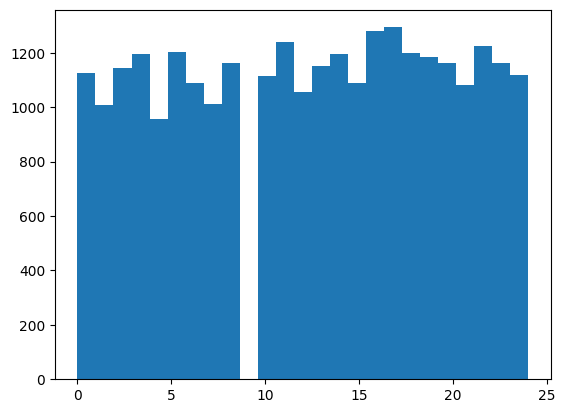

In [64]:
plt.hist(x = train_df['label'], bins = 25)
plt.show()

In [65]:
train_df['label'].value_counts() #The dataset seems to be well balanced

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [66]:
y_train = train_df['label']
y_test = test_df['label']
#remove the label col from the dataframe
del train_df['label']
del test_df['label']

In [67]:
#One hot encoding of the labels
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [68]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [69]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [70]:
x_train = train_df.values
x_test = test_df.values

In [71]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [72]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

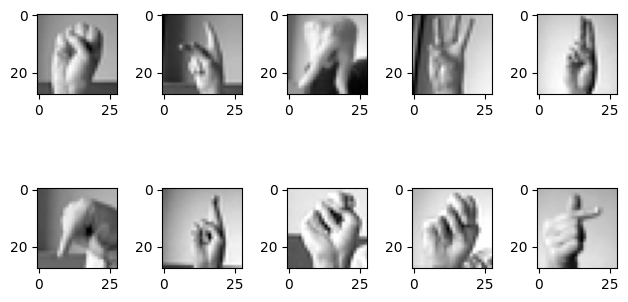

In [73]:
f, ax = plt.subplots(2,5)
# f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k+10].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [74]:
import torchvision
import torch
import torch.nn as nn
!pip install torchinfo
from torchinfo import summary


In [75]:
def setDevice(): # sets device to GPU
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  return device

In [76]:
from torch.utils.data import TensorDataset, DataLoader
x_train_tensor = torch.from_numpy(x_train).float() # convert to tensor
x_train_tensor = x_train_tensor.permute(0, 3, 1, 2)
y_train_tensor = torch.from_numpy(y_train).float()

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
trainloader = DataLoader(train_dataset, batch_size = 64, shuffle= True) # batch_size set to 64
x_test_tensor = torch.from_numpy(x_test).float()
x_test_tensor = x_test_tensor.permute(0, 3, 1, 2)
y_test_tensor = torch.from_numpy(y_test).float()
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
testloader = DataLoader(test_dataset, batch_size = 64, shuffle = False) # no need to shuffle test

In [77]:
'''x_train = torch.from_numpy(x_train).float()
y_trian = torch.from_numpy(y_train).float()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)'''

'x_train = torch.from_numpy(x_train).float()\ny_trian = torch.from_numpy(y_train).float()\nx_test = torch.from_numpy(x_test).float()\ny_test = torch.from_numpy(y_test).float()\ntrain = torch.utils.data.TensorDataset(x_train, y_train)\ntest = torch.utils.data.TensorDataset(x_test, y_test)'

In [78]:
'''train_dataloader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = False)'''

'train_dataloader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True) \ntest_dataloader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = False)'

In [79]:
class CNN(nn.Module):
  def __init__(self, num_classes = 24):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 7, kernel_size = 3, stride = 1, padding = 1) # performing convolution
    self.batch1 = nn.BatchNorm2d(num_features = 7)
    self.relu1 = nn.ReLU()
    self.drop1 = nn.Dropout(p = 0.3)
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2) # pooling image
    self.conv2 = nn.Conv2d(in_channels = 7, out_channels = 14, kernel_size = 3, stride = 1, padding = 1)
    self.batch2 = nn.BatchNorm2d(num_features = 14)
    self.relu2 = nn.ReLU()
    self.conv3 = nn.Conv2d(in_channels = 14, out_channels = 28, kernel_size = 3, stride = 1, padding = 1)
    self.batch3 = nn.BatchNorm2d(num_features = 28)
    self.relu3 = nn.ReLU()
    self.drop2 = nn.Dropout(p = 0.2)
    self.pool2= nn.MaxPool2d(kernel_size = 2, stride = 2) # pooling image
    self.conv4 = nn.Conv2d(in_channels = 28, out_channels = 56, kernel_size = 3, stride = 1, padding = 1)
    self.batch4 = nn.BatchNorm2d(num_features = 56)
    self.relu4 = nn.ReLU()
    self.drop3 = nn.Dropout(p = 0.5)
    self.conv5 = nn.Conv2d(in_channels = 56, out_channels = 112, kernel_size = 3, stride = 1, padding = 1)
    self.batch5 = nn.BatchNorm2d(num_features = 112)
    self.relu5 = nn.ReLU()
    self.fullyConnected = nn.Linear(in_features = 112*7*7, out_features = 24)


  def forward(self, input): # runs through neural network
    output = self.conv1(input)
    #print("Shape after conv1:", output.shape)
    output = self.batch1(output)
    #print("Shape after batch1:", output.shape)
    output = self.relu1(output)
    #print("Shape after relu1:", output.shape)
    output = self.drop1(output)
    #print("Shape after drop1:", output.shape)
    output = self.pool1(output)
    #print("Shape after pool1:", output.shape)
    output = self.conv2(output)
    #print("Shape after conv2:", output.shape)
    output = self.batch2(output)
    #print("Shape after batch2:", output.shape)
    output = self.relu2(output)
    #print("Shape after relu2:", output.shape)
    output = self.conv3(output)
    #print("Shape after conv3:", output.shape)
    output = self.batch3(output)
    #print("Shape after batch3:", output.shape)
    output = self.relu3(output)
    #print("Shape after relu3:", output.shape)
    output = self.drop1(output)
    #print("Shape after drop2", output.shape)
    output = self.pool2(output)
    #print("Shape after pool2:", output.shape)
    output = self.conv4(output)
    #print("Shape after conv4:", output.shape)
    output = self.batch4(output)
    #print("Shape after batch4:", output.shape)
    output = self.relu4(output)
    #print("Shape after relu4:", output.shape) # This one is important
    output = self.drop3(output)
    output = self.conv5(output)
    output = self.batch5(output)
    output = self.relu5(output)
    output = torch.flatten(output, 1)
    #print("Shape after flatten:", output.shape) # This one is important
    output = self.fullyConnected(output)
    #print("Shape after fullyConnected", output.shape)
    '''output = self.fullyConnected1(output)
    output = self.fullyConnected2(output)
    output = self.fullyConnected3(output)
    '''
    return output

In [80]:
import torch.optim as optim

model = CNN(num_classes = 24).to(setDevice())
#optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=0.0001) # initializing optimizer
loss_function = nn.CrossEntropyLoss()

In [81]:
summary(model, (64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 24]                  --
├─Conv2d: 1-1                            [64, 7, 28, 28]           70
├─BatchNorm2d: 1-2                       [64, 7, 28, 28]           14
├─ReLU: 1-3                              [64, 7, 28, 28]           --
├─Dropout: 1-4                           [64, 7, 28, 28]           --
├─MaxPool2d: 1-5                         [64, 7, 14, 14]           --
├─Conv2d: 1-6                            [64, 14, 14, 14]          896
├─BatchNorm2d: 1-7                       [64, 14, 14, 14]          28
├─ReLU: 1-8                              [64, 14, 14, 14]          --
├─Conv2d: 1-9                            [64, 28, 14, 14]          3,556
├─BatchNorm2d: 1-10                      [64, 28, 14, 14]          56
├─ReLU: 1-11                             [64, 28, 14, 14]          --
├─Dropout: 1-12                          [64, 28, 14, 14]          --
├─MaxPool2d

In [82]:
best_accuracy=0.0
train_count = 27455
test_count = 7172
num_epochs = 10





In [83]:
def trainCNN1(trainloader, testloader, model, optimizer, loss_function, num_epochs):
  for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()

        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1:5d}] Loss: {running_loss / 200:.3f}') # print loss
            running_loss = 0.0

    correct = 0
    total = 0

    for data in testloader:
      images, labels = data

      outputs = model(images)

      _, predicted = torch.max(outputs.data, 1)

      _, labels = torch.max(labels, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test images on epoch {epoch + 1}: {"{:.2f}".format(100*correct/total)} %')

  correct = 0
  total = 0

  with torch.no_grad(): # helps compute accuracy
    for data in testloader:
      images, labels = data

      outputs = model(images)

      _, predicted = torch.max(outputs.data, 1)

      _, labels = torch.max(labels, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {"{:.2f}".format(100*correct/total)} %') # computes overally accuracy

  classes = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y')
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  with torch.no_grad(): # matches predictions to class
    for data in testloader:
      images, one_hot_labels = data
      outputs = model(images)
      _, predictions = torch.max(outputs, 1)
      _, labels = torch.max(one_hot_labels, 1)

      for label, prediction in zip(labels, predictions): # helping to calculate accuracy of classes
        if label == prediction:
          correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
    accuracy = 100*float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %') # gives accuracy for each class
  print('Finished Training')

In [84]:
trainCNN1(trainloader, testloader, model, optimizer, loss_function, 10) # trains and tests the CNN

[1,   200] Loss: 0.847
[1,   400] Loss: 0.134
Accuracy of the network on the test images on epoch 1: 90.20 %
[2,   200] Loss: 0.070
[2,   400] Loss: 0.045
Accuracy of the network on the test images on epoch 2: 93.01 %
[3,   200] Loss: 0.034
[3,   400] Loss: 0.029
Accuracy of the network on the test images on epoch 3: 93.11 %
[4,   200] Loss: 0.021
[4,   400] Loss: 0.020
Accuracy of the network on the test images on epoch 4: 94.91 %
[5,   200] Loss: 0.027
[5,   400] Loss: 0.022
Accuracy of the network on the test images on epoch 5: 94.70 %
[6,   200] Loss: 0.012
[6,   400] Loss: 0.027
Accuracy of the network on the test images on epoch 6: 93.03 %
[7,   200] Loss: 0.028
[7,   400] Loss: 0.027
Accuracy of the network on the test images on epoch 7: 94.21 %
[8,   200] Loss: 0.014
[8,   400] Loss: 0.009
Accuracy of the network on the test images on epoch 8: 95.94 %
[9,   200] Loss: 0.007
[9,   400] Loss: 0.019
Accuracy of the network on the test images on epoch 9: 94.74 %
[10,   200] Loss: 0